<a href="https://colab.research.google.com/github/vvicky30/machine-learning/blob/master/face_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# check opencv version
import cv2
# print version number
print(cv2.__version__)

4.1.2


In [2]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-12-30 16:48:00--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.02s   

2019-12-30 16:48:01 (38.0 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [0]:
# load the photograph as sample picture to test trained model
pixels =cv2.imread('/content/college_test.jpg')

In [0]:
#  here we load the pre-trained model
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [11]:
#Once loaded, the model can be used to perform face detection on a photograph by calling the detectMultiScale() function.
#This function will return a list of bounding boxes for all faces detected in the photograph.
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
	print(box)   #it retuns exact coordinates of boxes where it detects the faces

[174  75 107 107]
[360 102 101 101]


In [0]:
#due to DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
#so we used the another method
 from google.colab.patches import cv2_imshow

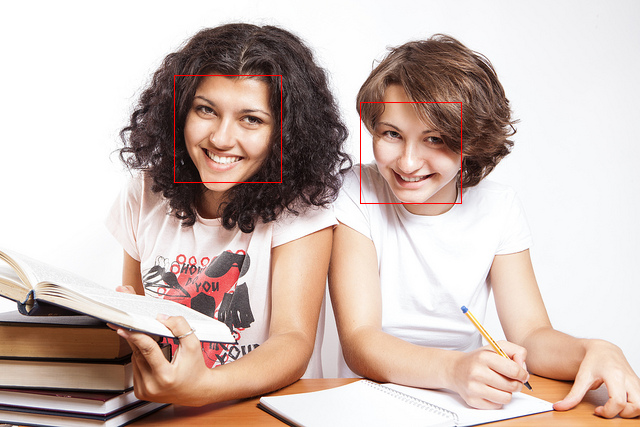

In [34]:
#We can update the example to plot the photograph and draw each bounding box.
#This can be achieved by drawing a rectangle for each box directly over the pixels of the loaded image using the rectangle() function that takes two points.
for box in bboxes:
  # extract
  x, y, width, height = box
  x2, y2 = x + width, y + height
  # draw a rectangle over the pixels
  cv2.rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)#red -rectangle
# show the image
cv2_imshow( pixels)
# keep the window open until we press a key
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()

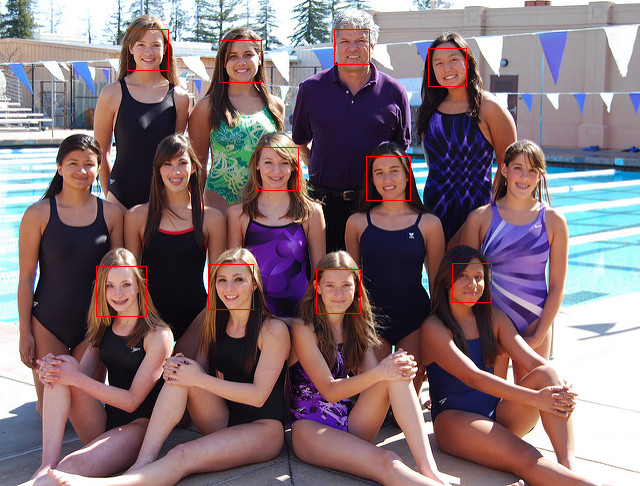

In [43]:
# load the photograph
pixels2 = cv2.imread('/content/swimming.jpg')
bboxes2 = classifier.detectMultiScale(pixels2,1.05,8)
'''
The scaleFactor controls how the input image is scaled prior to detection, e.g. is it scaled up or down, which can help to better find the faces in the image.
The default value is 1.1 (10% increase), 
although this can be lowered to values such as 1.05 (5% increase) or raised to values such as 1.4 (40% increase).
With some tuning, we  found that a scaleFactor of 1.05 successfully detected all of the faces,
but the background detected as a face did not disappear until a minNeighbors of 8, after which three faces on the middle row were no longer detected.
'''
for box in bboxes2:
  # extract
  x, y, width, height = box
  x2, y2 = x + width, y + height
  # draw a rectangle over the pixels2
  cv2.rectangle(pixels2, (x, y), (x2, y2), (0,0,255), 1)#red -rectangle
# show the image
cv2_imshow( pixels2)
# keep the window open until we press a key
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()

In [45]:
 !pip install mtcnn # “Multi-Task Cascaded Convolutional Neural Network,” or MTCNN for short,
 """
The MTCNN is popular because it achieved then state-of-the-art results on a range of benchmark datasets,
and because it is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid),
then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes,
and the third model (Output Network or O-Net) proposes facial landmarks.
 """

'\nThe MTCNN is popular because it achieved then state-of-the-art results on a range of benchmark datasets,\nand because it is capable of also recognizing other facial features such as eyes and mouth, called landmark detection.\n\nThe network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid),\nthen the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes,\nand the third model (Output Network or O-Net) proposes facial landmarks.\n'

In [46]:
!pip show mtcnn #some insights

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: opencv-python, keras
Required-by: 


In [51]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [100]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = '/content/college_test.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN() #An instance of the network can be created by calling the MTCNN() constructor.
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)
 

{'box': [186, 71, 87, 115], 'confidence': 0.9994562268257141, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}
{'box': [368, 75, 108, 138], 'confidence': 0.998593270778656, 'keypoints': {'left_eye': (392, 133), 'right_eye': (441, 140), 'nose': (407, 170), 'mouth_left': (388, 180), 'mouth_right': (438, 185)}}


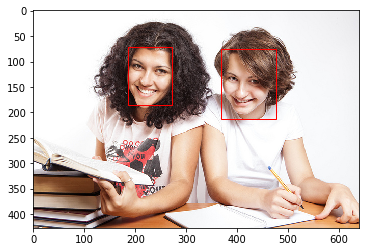

In [61]:
from matplotlib.patches import Rectangle
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

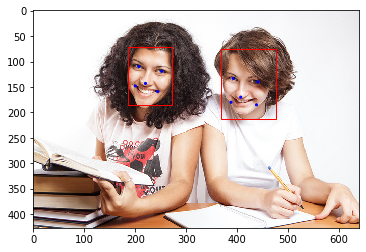

In [66]:
"""
We can draw a circle via the Circle class for the eyes, nose, and mouth; for example

# draw the dots
for key, value in result['keypoints'].items():
	# create and draw dot
	dot = Circle(value, radius=2, color='blue')
	ax.add_patch(dot)
"""
from matplotlib.patches import Circle
##similar code as above by here jst we adding for loops to create dots from result coordinates based on KEYPOINTS 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='blue')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

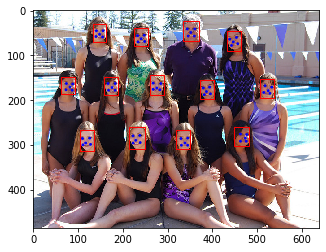

In [67]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='blue')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()

filename = '/content/swimming.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [0]:
'''
We may want to extract the detected faces and pass them as input to another system.

This can be achieved by extracting the pixel data directly out of the photograph; for example:

# get coordinates
x1, y1, width, height = result['box']
x2, y2 = x1 + width, y1 + height
# extract face
face = data[y1:y2, x1:x2]

We can demonstrate this by extracting each face and plotting them as separate subplots. You could just as easily save them to file.
The draw_faces() below extracts and plots each detected face in a photograph.

# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()

  '''


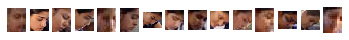

total no of persons: 15


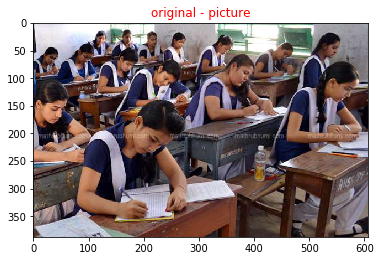

In [112]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()
    

filename = '/ch.jpg' #jpg reqired
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN() #An instance of the network can be created by calling the MTCNN() constructor.
# detect faces in the image
faces = detector.detect_faces(pixels)
c=0
for face in faces:
	c=c+1
print ("total no of persons:",c)
pyplot.title("original - picture",color='red')
pyplot.imshow(pixels)